# TP Scoring

## Membres: Linsey Nkatouloulou & Guilhem Mobasso

## Librairies

In [1]:
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## I- Préparation et analyse préliminaire du jeu de données

### Chargement du jeu de données

In [2]:
table = pq.read_table('../data/cleaned_data.parquet')
cleaned_df = table.to_pandas()

In [3]:
# Aperçu du jeu de données

pd.options.display.max_columns = None
pd.options.display.max_rows = None

cleaned_df.head(10)

,carte,pays,date,heure,dateheure,coderep,mcc,montant,fraude,fm_velocity_condition_3,fm_velocity_condition_6,fm_velocity_condition_12,fm_velocity_condition_24,fm_sum_3,fm_sum_6,fm_sum_12,fm_sum_24,fm_redondance_mcc_3,fm_redondance_mcc_6,fm_redondance_mcc_12,fm_redondance_mcc_24,fm_difference_pays_3,fm_difference_pays_6,fm_difference_pays_12,fm_difference_pays_24
0,0.0,840,2003-12-02,17:47:52,2003-12-02,15,5812,69.25,0.0,0,0,0,0,69.25,69.25,69.25,69.25,1,1,1,1,1,1,1,1
1,1.0,158,2003-11-25,06:00:20,2003-11-25,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1
2,2.0,826,2003-11-12,14:10:57,2003-11-12,15,5211,516.95,0.0,0,0,0,0,516.95,516.95,516.95,516.95,1,1,1,1,1,1,1,1
3,3.0,840,2003-11-07,03:41:55,2003-11-07,14,7399,0.01,0.0,0,0,0,0,0.01,0.01,0.01,0.01,1,1,1,1,1,1,1,1
4,4.0,158,2003-11-23,05:07:03,2003-11-23,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1
5,5.0,158,2003-11-17,02:26:28,2003-11-17,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1
6,6.0,840,2003-12-03,02:52:14,2003-12-03,15,5969,48.46,0.0,0,0,0,0,48.46,48.46,48.46,48.46,1,1,1,1,1,1,1,1
7,6.0,840,2003-12-04,02:36:37,2003-12-04,15,5969,48.32,0.0,0,0,0,0,48.32,48.32,48.32,96.50,1,1,1,2,1,1,1,1
8,6.0,840,2003-12-05,02:46:17,2003-12-05,15,5969,48.32,0.0,0,0,0,0,48.32,48.32,48.32,48.32,1,1,1,1,1,1,1,1
9,6.0,840,2003-12-06,02:30:31,2003-12-06,15,5969,48.18,0.0,0,0,0,0,48.18,48.18,48.18,96.78,1,1,1,2,1,1,1,1


### II- Analyses descriptives univariées

In [7]:
# Tableau descriptifs des variables quantitatives

cleaned_df.describe(percentiles=[.25,.50,.75]).round(2)

,carte,montant,fraude,fm_velocity_condition_3,fm_velocity_condition_6,fm_velocity_condition_12,fm_velocity_condition_24,fm_sum_3,fm_sum_6,fm_sum_12,fm_sum_24,fm_redondance_mcc_3,fm_redondance_mcc_6,fm_redondance_mcc_12,fm_redondance_mcc_24,fm_difference_pays_3,fm_difference_pays_6,fm_difference_pays_12,fm_difference_pays_24
count,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00
mean,100208.39,141.96,0.01,1.24,1.33,1.41,1.65,212.85,229.46,246.21,296.37,1.13,1.15,1.19,1.26,1.06,1.07,1.09,1.13
std,56243.73,678.27,0.08,0.91,1.18,1.45,2.09,1474.47,1511.74,1556.26,2253.86,0.64,0.75,0.99,1.52,0.28,0.34,0.39,0.52
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,52279.00,24.50,0.00,1.00,1.00,1.00,1.00,29.25,30.00,31.02,34.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
50%,103883.00,48.34,0.00,1.00,1.00,1.00,1.00,61.19,65.10,68.93,79.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
75%,148717.25,114.90,0.00,1.00,1.00,2.00,2.00,151.00,162.10,173.20,201.63,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
max,198043.00,546382.20,1.00,46.00,81.00,110.00,129.00,546382.20,546382.20,546382.20,546500.70,39.00,39.00,46.00,59.00,10.00,15.00,15.00,17.00


In [8]:
print(f'Répartition variable "{"fraude"}":')
cleaned_df[["fraude"]].value_counts(normalize=False)

Répartition variable "fraude":


fraude
0.0       1144186
1.0          7246
dtype: int64

In [9]:
#Graphique pie plot pour les variables qualitatives

def pie_plot(df, var_list):
    colors = ['#1f77b4', '#9467bd']

    for var in var_list:
        counts = df[var].value_counts()

        percentages = (counts / counts.sum()) * 100

        explode = (0.1, 0)

        plt.figure(figsize=(6, 6))
        plt.pie(percentages, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)

        plt.title(f"Répartition de la variable {var}")
        plt.axis('equal')
        plt.show()

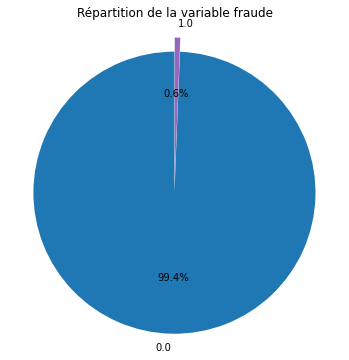

In [10]:
#Liste des variables binaires 
pie_vars_list = ["fraude"]
pie_plot(cleaned_df, pie_vars_list)

Fraude par pays/MCC

In [60]:
def calculer_pourcentage_fraude_par_variable(cleaned_df, variable):

    fraude_par_variable = cleaned_df.groupby(variable)['fraude'].agg(['sum', 'count'])
    fraude_par_variable['pourcentage_valeur'] = (fraude_par_variable['sum'] / fraude_par_variable['count']) * 100
    fraude_par_variable.rename(columns={'sum': 'nombre_de_fraudes', 'count': 'nombre_total_trans'}, inplace=True)
    
    fraude_validée = cleaned_df[(cleaned_df['coderep'] != '00') & (cleaned_df['fraude'] == 1)]
    nombre_de_fraudes_acceptees = fraude_validée.groupby(variable).size()
    fraude_par_variable['nombre_de_fraudes_acceptees'] = nombre_de_fraudes_acceptees

    fraude_par_variable['pourcentage_de_fraudes_acceptees_valeur'] = (fraude_par_variable['nombre_de_fraudes_acceptees'] / fraude_par_variable['nombre_de_fraudes']) * 100
    fraude_par_variable['pourcentage_de_fraudes_acceptees'] = fraude_par_variable['pourcentage_de_fraudes_acceptees_valeur'].apply(lambda x: f"{x:.3f}%")
    
    fraude_par_variable['nombre_de_fraudes_acceptees'].fillna(0, inplace=True)

    fraude_par_variable = fraude_par_variable[fraude_par_variable['nombre_de_fraudes_acceptees'] > 0]

    fraude_par_variable = fraude_par_variable.sort_values(by='pourcentage_de_fraudes_acceptees_valeur', ascending=False).drop(columns='pourcentage_valeur')
   
    fraude_par_variable = fraude_par_variable.drop(columns='pourcentage_de_fraudes_acceptees_valeur')
    
    return fraude_par_variable


In [61]:
resultat_fraude_par_pays = calculer_pourcentage_fraude_par_variable(cleaned_df, 'pays')
resultat_fraude_par_pays

,nombre_de_fraudes,nombre_total_trans,nombre_de_fraudes_acceptees,pourcentage_de_fraudes_acceptees
pays,,,,
690,4.0,141,4.0,100.000%
630,3.0,223,2.0,66.667%
410,12.0,1071,7.0,58.333%
686,21.0,2045,10.0,47.619%
214,26.0,3936,10.0,38.462%
246,14.0,1622,5.0,35.714%
276,164.0,48910,54.0,32.927%
752,122.0,7050,39.0,31.967%
554,41.0,2195,13.0,31.707%


In [62]:
resultat_fraude_par_mcc = calculer_pourcentage_fraude_par_variable(cleaned_df, 'mcc')
resultat_fraude_par_mcc

,nombre_de_fraudes,nombre_total_trans,nombre_de_fraudes_acceptees,pourcentage_de_fraudes_acceptees
mcc,,,,
0000,2.0,48,2.0,100.000%
5718,3.0,6,3.0,100.000%
5013,2.0,163,2.0,100.000%
4899,1.0,145,1.0,100.000%
7392,4.0,632,4.0,100.000%
5172,2.0,41,2.0,100.000%
4457,1.0,197,1.0,100.000%
7911,2.0,43,2.0,100.000%
3779,1.0,118,1.0,100.000%


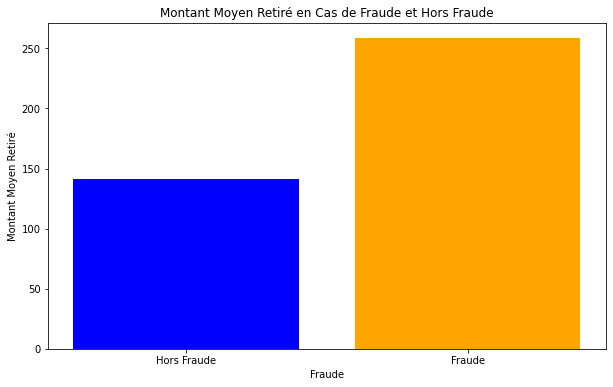

In [21]:


# Calculer le montant moyen pour les cas de fraude et hors fraude
montant_moyen = cleaned_df.groupby('fraude')['montant'].mean().reset_index()
montant_moyen.rename(columns={'montant': 'montant_moyen'}, inplace=True)

# Tracer l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(montant_moyen['fraude'].astype(str), montant_moyen['montant_moyen'], color=['blue', 'orange'])
plt.xlabel('Fraude')
plt.ylabel('Montant Moyen Retiré')
plt.title('Montant Moyen Retiré en Cas de Fraude et Hors Fraude')
plt.xticks([0, 1], ['Hors Fraude', 'Fraude'])
plt.show()



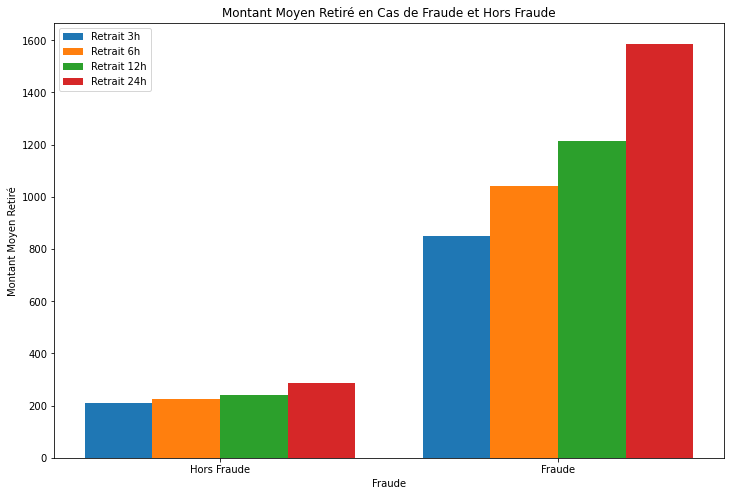

In [35]:
# Calculer le montant moyen pour chaque variable en cas de fraude et hors fraude
montant_moyen_3h = cleaned_df.groupby('fraude')['fm_sum_3'].mean().reset_index()
montant_moyen_3h.rename(columns={'fm_sum_3': 'montant_moyen_3h'}, inplace=True)

montant_moyen_6h = cleaned_df.groupby('fraude')['fm_sum_6'].mean().reset_index()
montant_moyen_6h.rename(columns={'fm_sum_6': 'montant_moyen_6h'}, inplace=True)

montant_moyen_12h = cleaned_df.groupby('fraude')['fm_sum_12'].mean().reset_index()
montant_moyen_12h.rename(columns={'fm_sum_12': 'montant_moyen_12h'}, inplace=True)

montant_moyen_24h = cleaned_df.groupby('fraude')['fm_sum_24'].mean().reset_index()
montant_moyen_24h.rename(columns={'fm_sum_24': 'montant_moyen_24h'}, inplace=True)

# Fusionner les résultats dans un seul DataFrame
montant_moyen = pd.merge(montant_moyen_3h, montant_moyen_6h, on='fraude')
montant_moyen = pd.merge(montant_moyen, montant_moyen_12h, on='fraude')
montant_moyen = pd.merge(montant_moyen, montant_moyen_24h, on='fraude')

# Tracer l'histogramme avec courbes en pointillé
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
index = range(len(montant_moyen))

# Tracer les barres
bar1 = ax.bar([i - 1.5 * bar_width for i in index], montant_moyen['montant_moyen_3h'], bar_width, label='Retrait 3h')
bar2 = ax.bar([i - 0.5 * bar_width for i in index], montant_moyen['montant_moyen_6h'], bar_width, label='Retrait 6h')
bar3 = ax.bar([i + 0.5 * bar_width for i in index], montant_moyen['montant_moyen_12h'], bar_width, label='Retrait 12h')
bar4 = ax.bar([i + 1.5 * bar_width for i in index], montant_moyen['montant_moyen_24h'], bar_width, label='Retrait 24h')


ax.set_xlabel('Fraude')
ax.set_ylabel('Montant Moyen Retiré')
ax.set_title('Montant Moyen Retiré en Cas de Fraude et Hors Fraude')
ax.set_xticks(index)
ax.set_xticklabels(['Hors Fraude', 'Fraude'])
ax.legend()

plt.show()


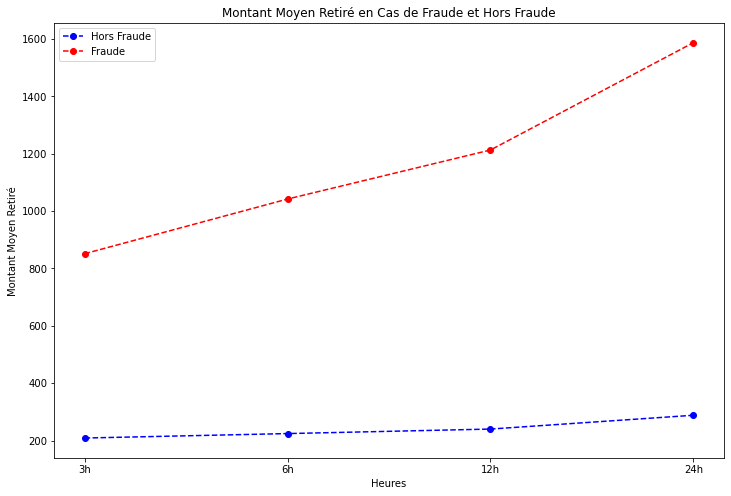

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculer le montant moyen pour chaque variable en cas de fraude et hors fraude
montant_moyen_3h = cleaned_df.groupby('fraude')['fm_sum_3'].mean().reset_index()
montant_moyen_3h.rename(columns={'fm_sum_3': 'montant_moyen_3h'}, inplace=True)

montant_moyen_6h = cleaned_df.groupby('fraude')['fm_sum_6'].mean().reset_index()
montant_moyen_6h.rename(columns={'fm_sum_6': 'montant_moyen_6h'}, inplace=True)

montant_moyen_12h = cleaned_df.groupby('fraude')['fm_sum_12'].mean().reset_index()
montant_moyen_12h.rename(columns={'fm_sum_12': 'montant_moyen_12h'}, inplace=True)

montant_moyen_24h = cleaned_df.groupby('fraude')['fm_sum_24'].mean().reset_index()
montant_moyen_24h.rename(columns={'fm_sum_24': 'montant_moyen_24h'}, inplace=True)

# Fusionner les résultats dans un seul DataFrame
montant_moyen = pd.merge(montant_moyen_3h, montant_moyen_6h, on='fraude')
montant_moyen = pd.merge(montant_moyen, montant_moyen_12h, on='fraude')
montant_moyen = pd.merge(montant_moyen, montant_moyen_24h, on='fraude')

# Tracer les courbes
fig, ax = plt.subplots(figsize=(12, 8))

# Données pour les courbes
heures = ['3h', '6h', '12h', '24h']
montant_hors_fraude = montant_moyen[montant_moyen['fraude'] == 0][['montant_moyen_3h', 'montant_moyen_6h', 'montant_moyen_12h', 'montant_moyen_24h']].values.flatten()
montant_fraude = montant_moyen[montant_moyen['fraude'] == 1][['montant_moyen_3h', 'montant_moyen_6h', 'montant_moyen_12h', 'montant_moyen_24h']].values.flatten()

# Tracer les courbes
ax.plot(heures, montant_hors_fraude, linestyle='--', marker='o', color='blue', label='Hors Fraude')
ax.plot(heures, montant_fraude, linestyle='--', marker='o', color='red', label='Fraude')

ax.set_xlabel('Heures')
ax.set_ylabel('Montant Moyen Retiré')
ax.set_title('Montant Moyen Retiré en Cas de Fraude et Hors Fraude')
ax.legend()

plt.show()


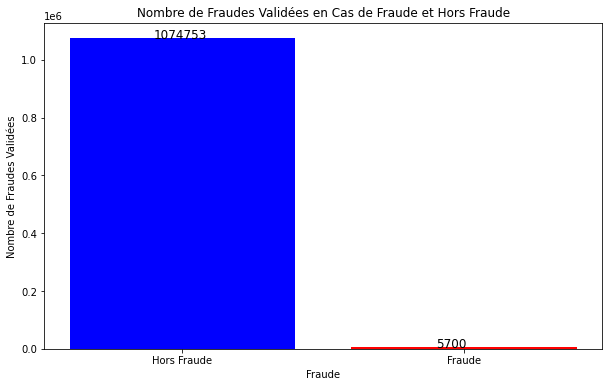

In [28]:

transactions_validees = cleaned_df[cleaned_df['coderep'] == '00']

# Compter le nombre d'occurrences de fraude validée
fraude_validee = transactions_validees.groupby('fraude').size().reset_index(name='nombre_de_fraudes_validees')

# Tracer le graphique
plt.figure(figsize=(10, 6))
bars = plt.bar(fraude_validee['fraude'].astype(str), fraude_validee['nombre_de_fraudes_validees'], color=['blue', 'red'])
plt.xlabel('Fraude')
plt.ylabel('Nombre de Fraudes Validées')
plt.title('Nombre de Fraudes Validées en Cas de Fraude et Hors Fraude')
plt.xticks([0, 1], ['Hors Fraude', 'Fraude'])

# Ajouter des annotations pour chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 5, int(yval), fontsize=12)

plt.show()


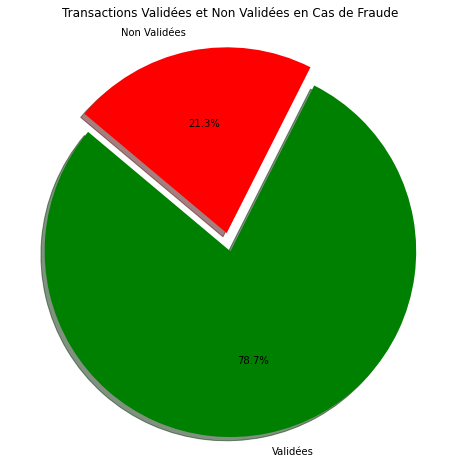

In [29]:
fraude_transactions = cleaned_df[cleaned_df['fraude'] == 1]

# Compter le nombre de transactions validées et non validées
fraude_validees = fraude_transactions[fraude_transactions['coderep'] == '00'].shape[0]
fraude_non_validees = fraude_transactions[fraude_transactions['coderep'] != '00'].shape[0]

# Préparer les données pour le camembert
labels = ['Validées', 'Non Validées']
sizes = [fraude_validees, fraude_non_validees]
colors = ['green', 'red']
explode = (0.1, 0)  # "explose" la première tranche (validées)

# Tracer le graphique en camembert
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Transactions Validées et Non Validées en Cas de Fraude')
plt.axis('equal')  # Assure que le camembert soit un cercle

plt.show()


In [95]:
def tracer_histogramme_fraudes_par_plage_horaire(df):
    df_copy = df.copy()
    
    bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
    labels = ['0-3h', '3-6h', '6-9h', '9-12h', '12-15h', '15-18h', '18-21h', '21-00h']
    
    df_copy['heure'] = pd.to_datetime(df_copy['heure'], format='%H:%M:%S').dt.hour
    
    df_copy['plage_horaire'] = pd.cut(df_copy['heure'], bins=bins, labels=labels, right=False)
    
    fraudes = df_copy[df_copy['fraude'] == 1]
    
    fraudes_par_plage = fraudes['plage_horaire'].value_counts().sort_index()
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(fraudes_par_plage.index, fraudes_par_plage.values, color='red', alpha=0.7)
    
    plt.plot(fraudes_par_plage.index, fraudes_par_plage.values, linestyle='--', color='blue', marker='o')
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2 - 0.15, yval + 1, int(yval), fontsize=12, color='black')
    
    plt.xlabel('Plage Horaire')
    plt.ylabel('Nombre de Fraudes')
    plt.title('Nombre de Fraudes par Plage Horaire')
    plt.xticks(rotation=45)
    plt.show()



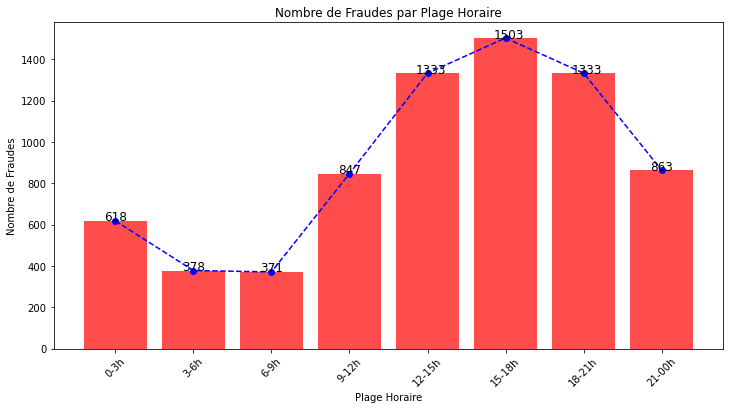

None


In [98]:
result = tracer_histogramme_fraudes_par_plage_horaire(df = cleaned_df)
print(result)

In [111]:
def tracer_histogramme_fraudes_par_mois(df):
    # Créer une copie du DataFrame pour ne pas modifier l'original
    df_copy = df.copy()
    
    # S'assurer que la colonne 'date' est au format datetime
    df_copy['date'] = pd.to_datetime(df_copy['date'])
    
    # Extraire le mois et l'année de la colonne 'date'
    df_copy['mois_annee'] = df_copy['date'].dt.to_period('M')
    
    # Filtrer les fraudes
    fraudes = df_copy[df_copy['fraude'] == 1]
    
    # Compter le nombre de fraudes par mois
    fraudes_par_mois = fraudes['mois_annee'].value_counts().sort_index()
    
    # Tracer l'histogramme
    plt.figure(figsize=(12, 6))
    bars = plt.bar(fraudes_par_mois.index.astype(str), fraudes_par_mois.values, color='blue', alpha=0.7)
    
    # Ajouter une ligne en pointillée
    plt.plot(fraudes_par_mois.index.astype(str), fraudes_par_mois.values, linestyle='--', color='blue', marker='o')
    
    # Annoter chaque sommet avec les valeurs correspondantes
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2 - 0.15, yval + 1, int(yval), fontsize=12, color='black')
    
    plt.xlabel('Mois')
    plt.ylabel('Nombre de Fraudes')
    plt.title('Nombre de Fraudes par Mois')
    plt.xticks(rotation=45)
    plt.show()


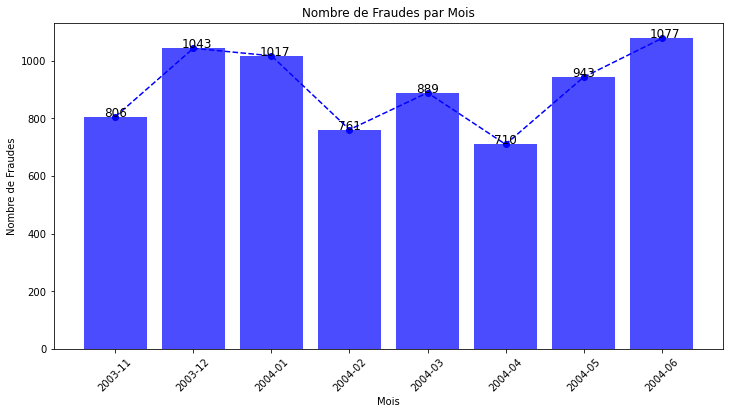

In [112]:
tracer_histogramme_fraudes_par_mois(cleaned_df)

analyse des fraudes validées

In [106]:
fraudes_validees = cleaned_df[(cleaned_df['coderep'] != '00') & (cleaned_df['fraude'] == 1)]



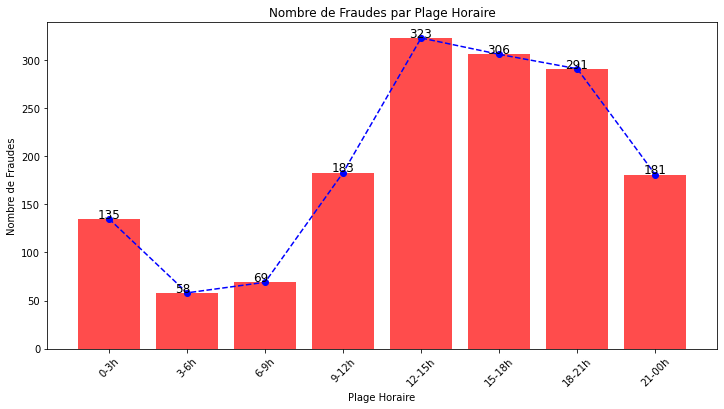

In [107]:
result_2 = tracer_histogramme_fraudes_par_plage_horaire(df = fraudes_validees)

In [117]:
cleaned_df.head()

,carte,pays,date,heure,dateheure,coderep,mcc,montant,fraude,fm_velocity_condition_3,fm_velocity_condition_6,fm_velocity_condition_12,fm_velocity_condition_24,fm_sum_3,fm_sum_6,fm_sum_12,fm_sum_24,fm_redondance_mcc_3,fm_redondance_mcc_6,fm_redondance_mcc_12,fm_redondance_mcc_24,fm_difference_pays_3,fm_difference_pays_6,fm_difference_pays_12,fm_difference_pays_24
0,0.0,840,2003-12-02,17:47:52,2003-12-02,15,5812,69.25,0.0,0,0,0,0,69.25,69.25,69.25,69.25,1,1,1,1,1,1,1,1
1,1.0,158,2003-11-25,06:00:20,2003-11-25,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1
2,2.0,826,2003-11-12,14:10:57,2003-11-12,15,5211,516.95,0.0,0,0,0,0,516.95,516.95,516.95,516.95,1,1,1,1,1,1,1,1
3,3.0,840,2003-11-07,03:41:55,2003-11-07,14,7399,0.01,0.0,0,0,0,0,0.01,0.01,0.01,0.01,1,1,1,1,1,1,1,1
4,4.0,158,2003-11-23,05:07:03,2003-11-23,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1


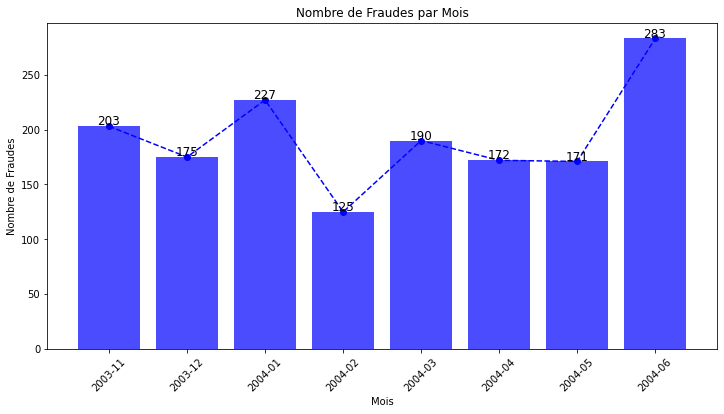

In [113]:
tracer_histogramme_fraudes_par_mois(fraudes_validees)

ANALYSE UNIVARIEE

CONSIGNE : 


* transformer en fonction : plutot que le pourcentage mettre OK
* faire le montant moyen en tant de fraude et hors fraude OK
* le nombre de fois ou la fraude a été validée OK
* analyser la plage horaire pour les fraudes OK
* lorque la fraude a été validée réanalyser les premières questions (est ce que c'est à cause d'un pays, commercant, heure correct) OK
* fm_sum : vérifier si la fraude se repete en générale - cas de fraude histogramme avec la barre au milieu pour voir le comportement moyen sur 24h OK
* fm_difference : analyser si les transactions sont internationales en cas de fraudes : niveau temps regarder réflechir ... 
* fm_redondance : commercant a risque cf fonction créée OK

analyse multivarié ?

* split train test  test_y train_X

In [7]:
var_num = ['montant','fm_sum_3'	,'fm_sum_6',	'fm_sum_12',	'fm_sum_24',	'fm_redondance_mcc_3',	'fm_redondance_mcc_6',	'fm_redondance_mcc_12',	'fm_redondance_mcc_24',	'fm_difference_pays_3',	'fm_difference_pays_6',	'fm_difference_pays_12',	'fm_difference_pays_24']
var_car = ['carte'	,'pays',	'coderep',	'mcc']

LE DF est très volumieux : il faut travailler avec des samples

In [5]:
def tracer_distributions(dataframe, target, sample_fraction=0.01):
    # Échantillonner le DataFrame
    df_sampled = dataframe.sample(frac=sample_fraction, random_state=42)
    
    # Boucle pour tracer des distributions pour chaque colonne sauf la colonne cible
    for i in dataframe.columns:
        if i != target:
            sns.displot(df_sampled, x=i, hue=target, stat="density", common_norm=False)
            plt.title(f'Distribution de {i} par statut de fraude')
            plt.show()


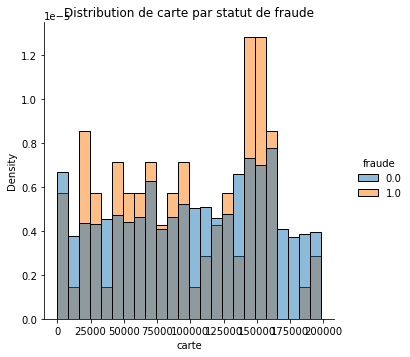

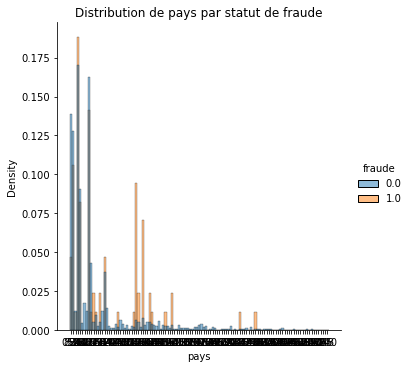

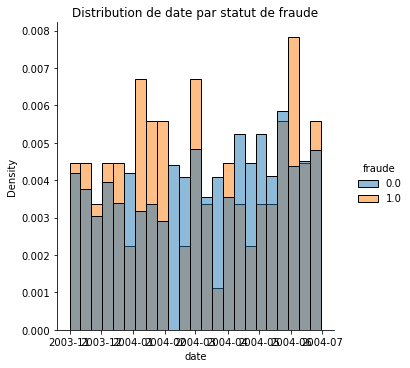

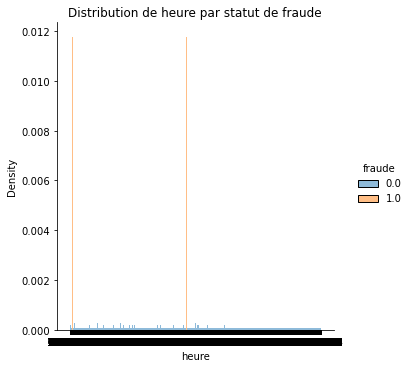

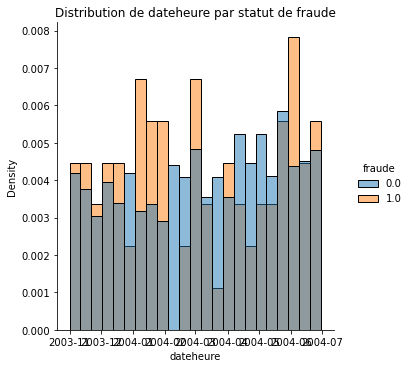

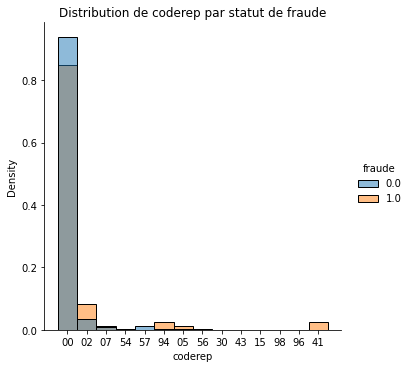

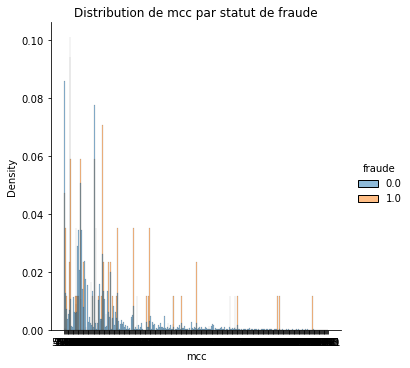

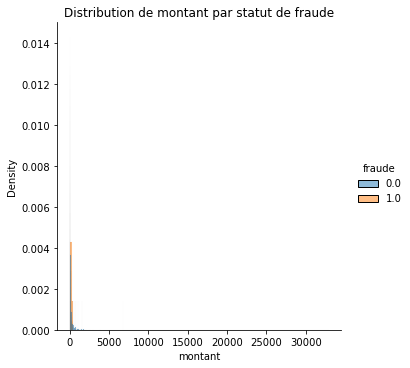

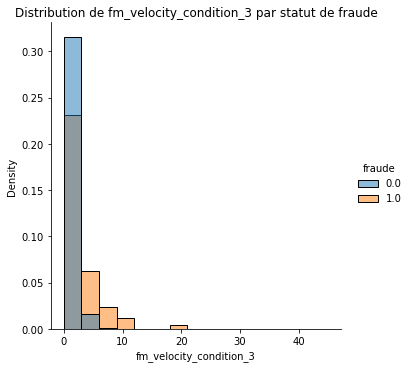

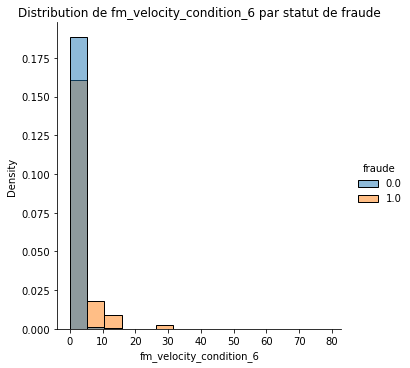

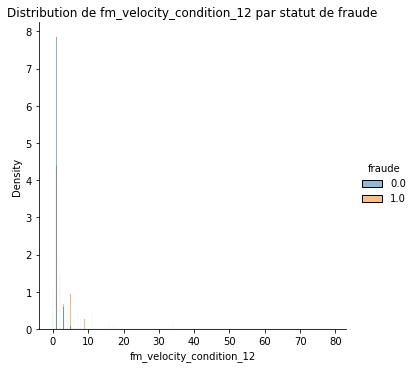

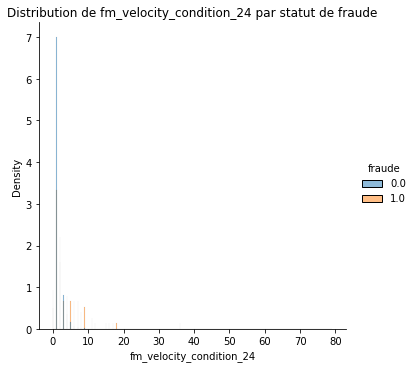

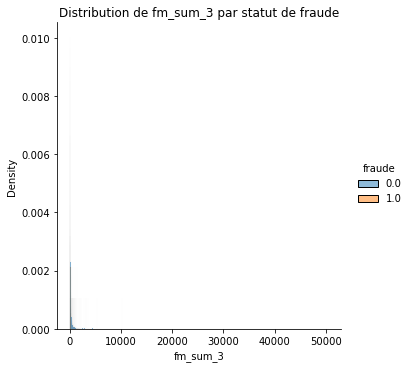

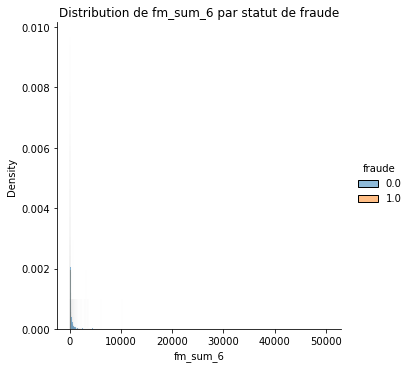

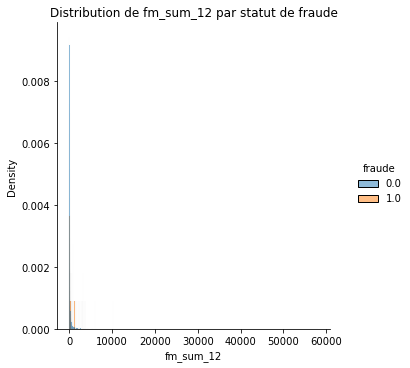

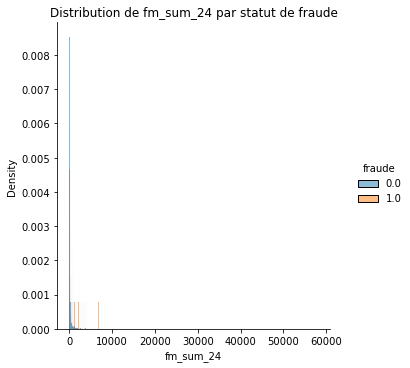

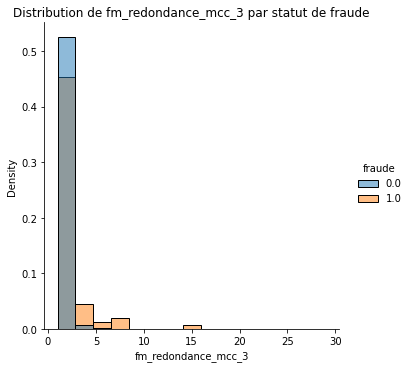

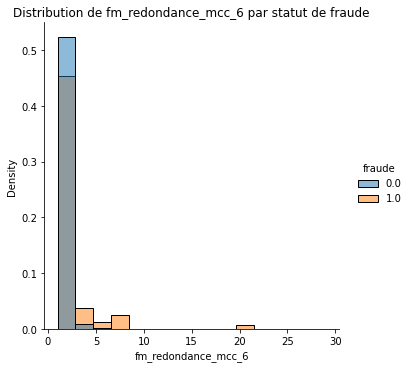

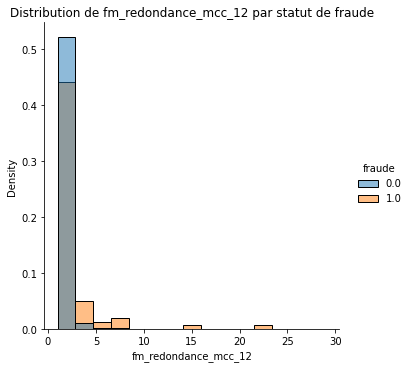

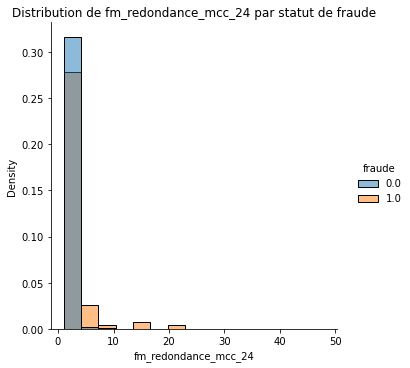

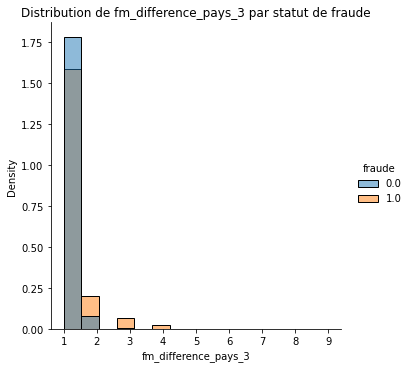

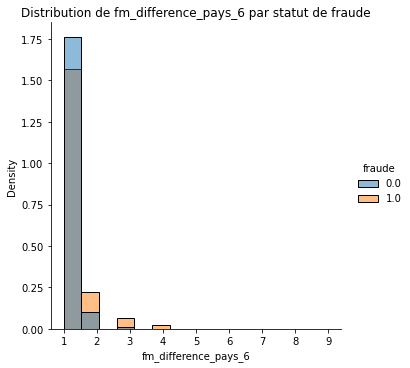

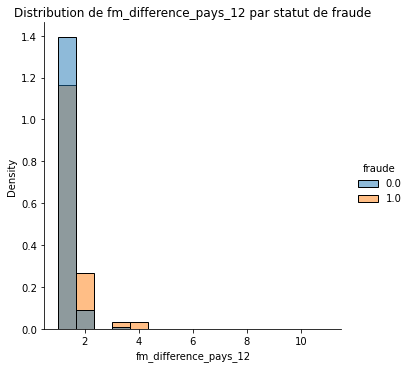

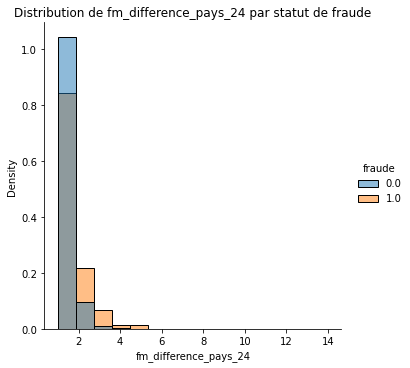

In [6]:
tracer_distributions(cleaned_df, 'fraude')

In [8]:
import warnings

def distrib_for_num_by_target(var_num, dataframe, target, sample_fraction=0.01):
    """
    Fonction de distribution d'une variable explicative selon la variable cible (x|y)
    var_num : variable explicative à étudier
    dataframe : DataFrame contenant les données
    target : variable cible
    sample_fraction : fraction des données à échantillonner
    """
    # Échantillonner le DataFrame
    df_sampled = dataframe.sample(frac=sample_fraction, random_state=42)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 7))
    sns.histplot(df_sampled[df_sampled[target] == 0][var_num], ax=ax1, kde=True, stat="density")
    sns.histplot(df_sampled[df_sampled[target] == 1][var_num], ax=ax2, kde=True, stat="density")
    ax1.set_title(f"Distribution de la variable {var_num} \n pour '{target}' = 0")
    ax2.set_title(f"Distribution de la variable {var_num} \n pour '{target}' = 1")
    plt.show()

warnings.filterwarnings("ignore", category=FutureWarning)





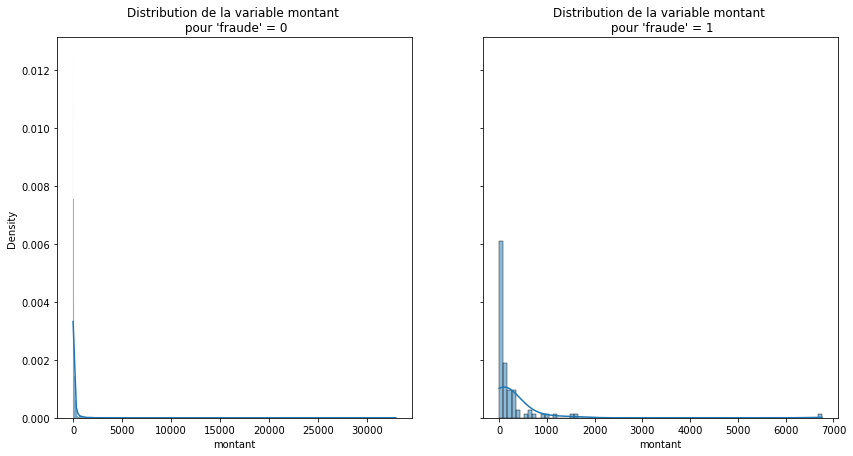

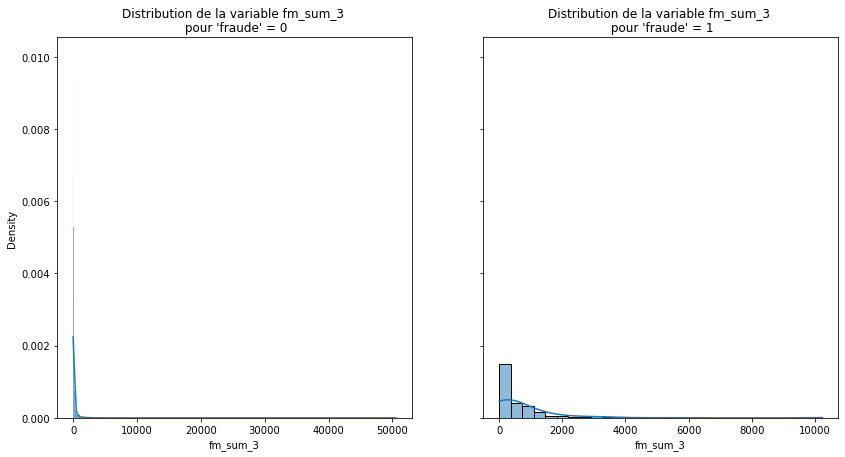

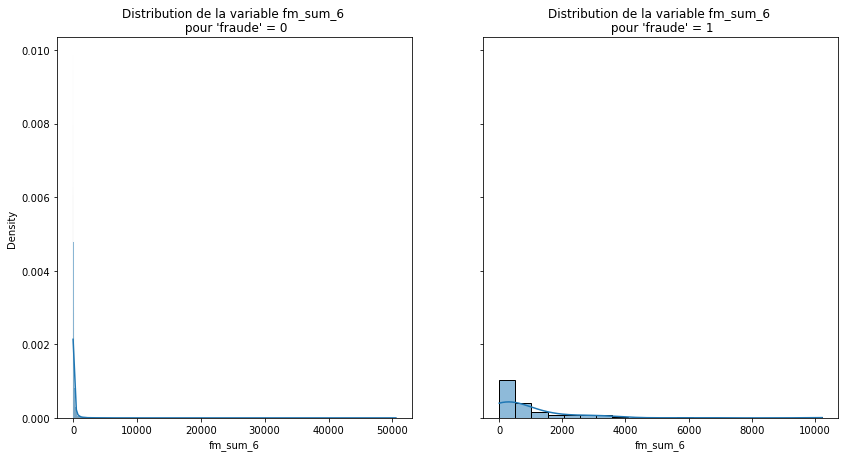

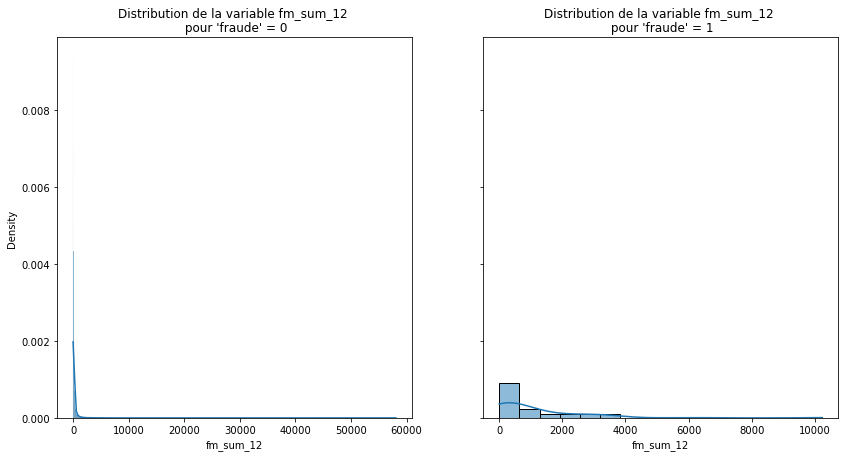

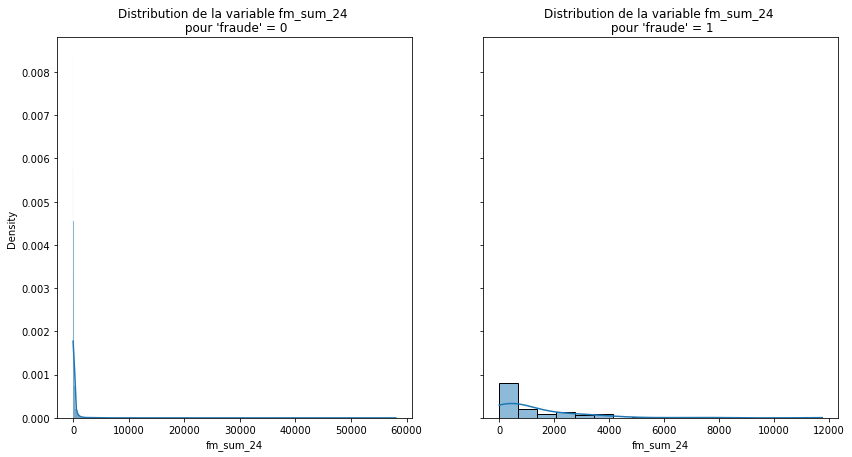

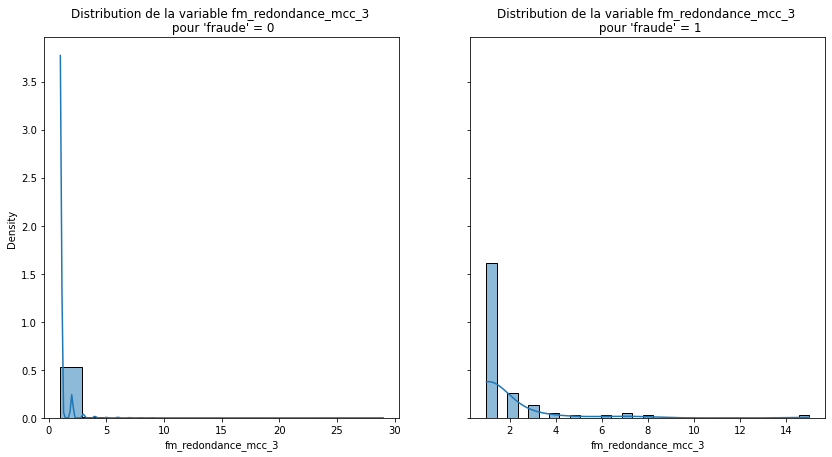

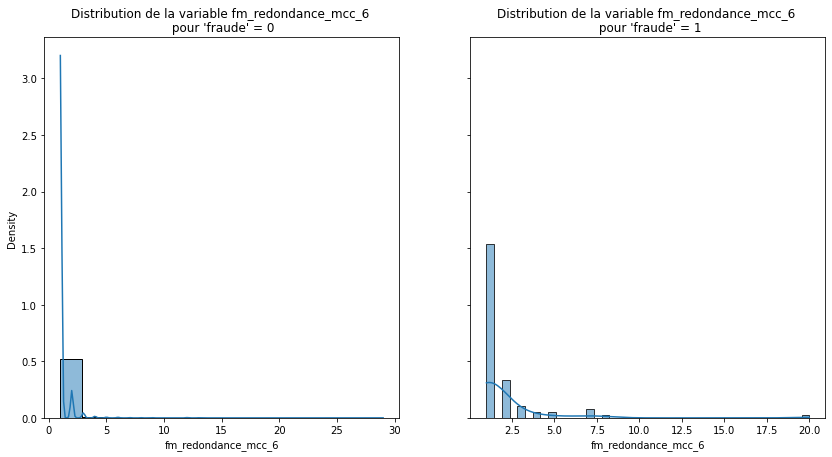

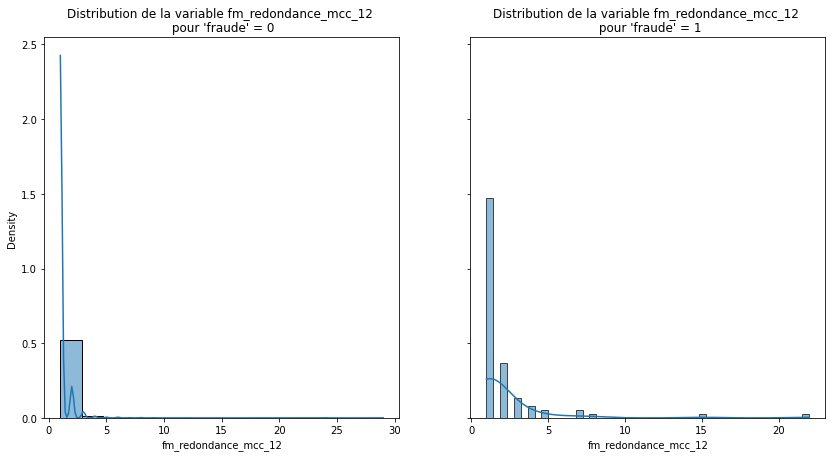

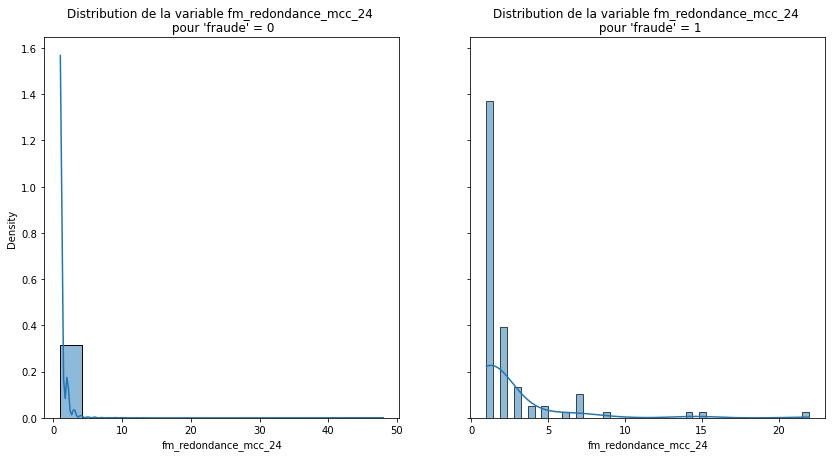

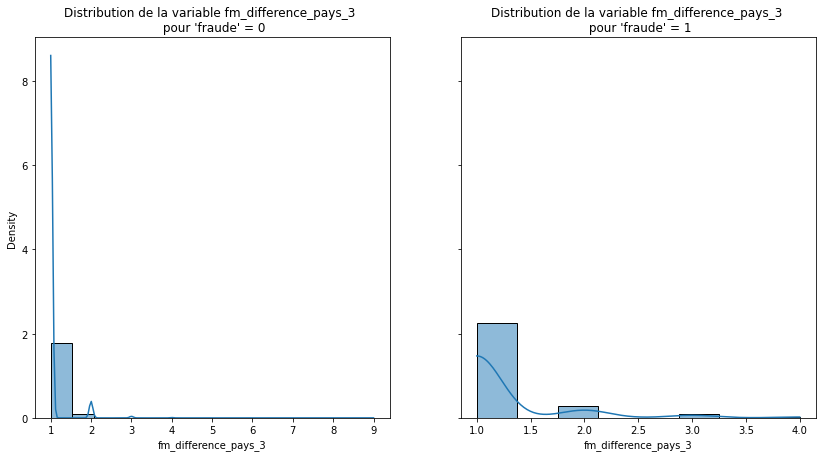

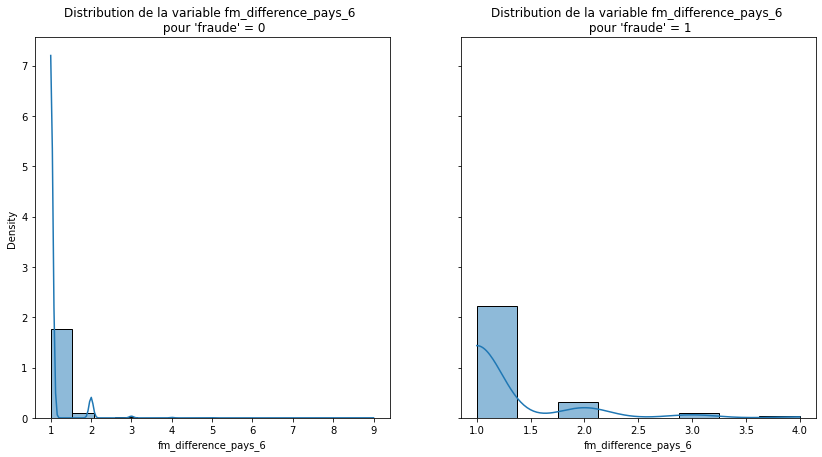

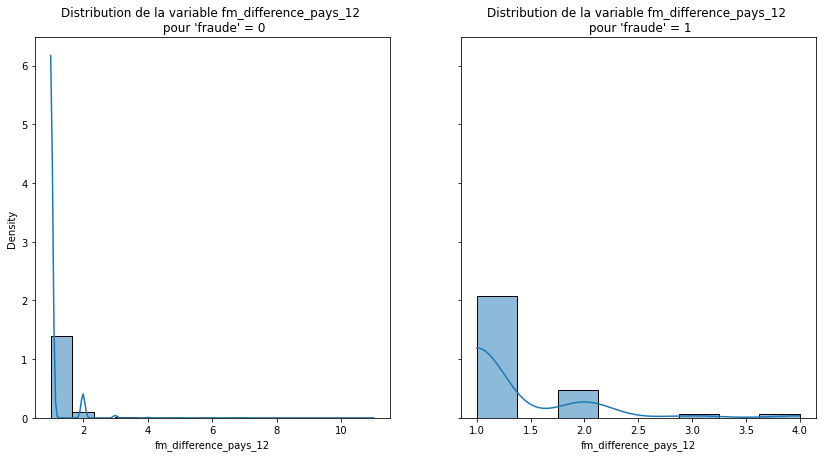

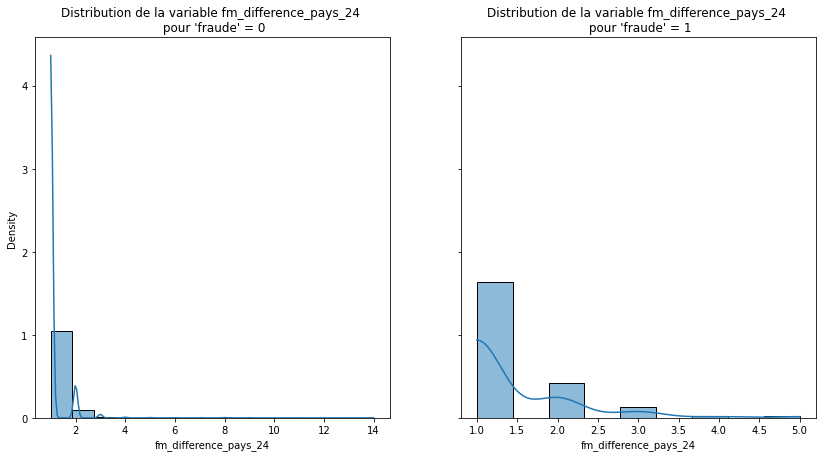

In [10]:
for var in var_num:
    distrib_for_num_by_target(var, cleaned_df, 'fraude', sample_fraction=0.01)

In [18]:
import numpy as np

def boxplot_by_target(var, dataframe, target, sample_fraction=0.01):
   
    df_sampled = dataframe.sample(frac=sample_fraction, random_state=42)
    
    plt.figure(figsize=(9, 7))
    ax = sns.boxplot(y=df_sampled[var], x=df_sampled[target])
    
    mean_val = df_sampled[var].mean()
    p99_val = np.percentile(df_sampled[var], 99)
    p01_val = np.percentile(df_sampled[var], 1)
    
    ax.axhline(mean_val, ls='--', color='red', label=f"Mean = {mean_val:.2f}")
    ax.axhline(p99_val, ls='--', color='green', label=f"P99 = {p99_val:.2f}")
    ax.axhline(p01_val, ls='--', color='blue', label=f"P01 = {p01_val:.2f}")
    ax.set_ylim(p01_val - (p99_val - p01_val) * 0.1, p99_val + (p99_val - p01_val) * 0.1)
    
    
    ax.legend(loc='best')
    ax.set_title(f"Etude de la variable {var} \n par modalité de la variable '{target}'")
    plt.show()



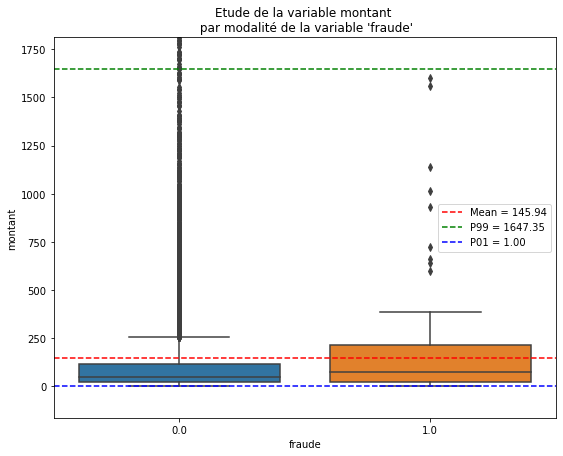

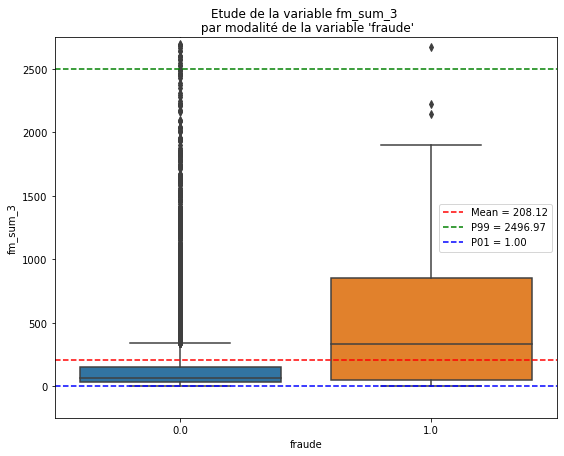

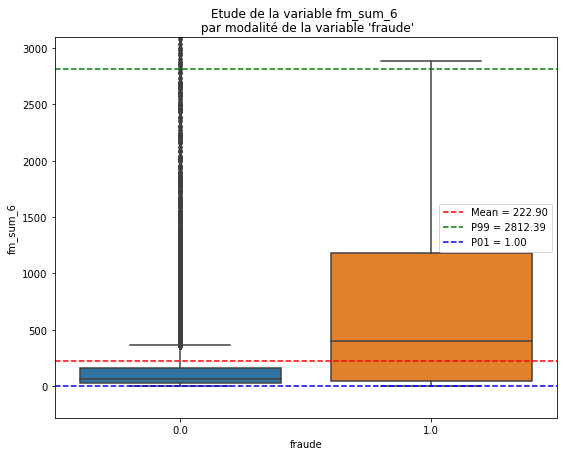

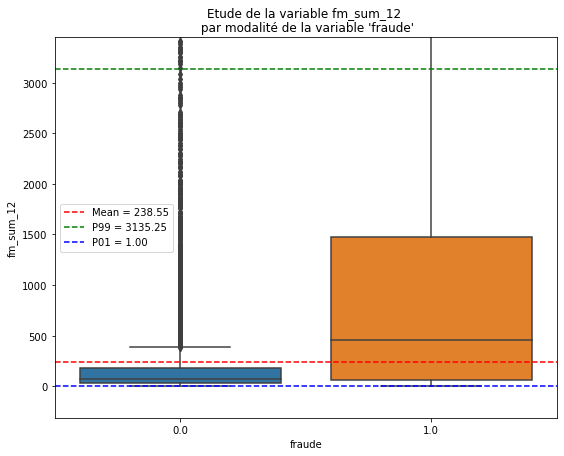

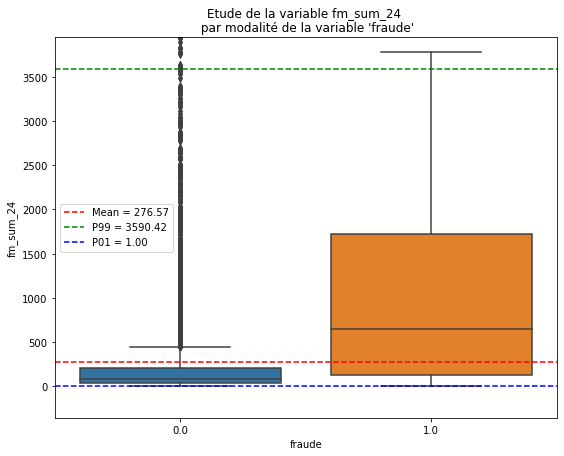

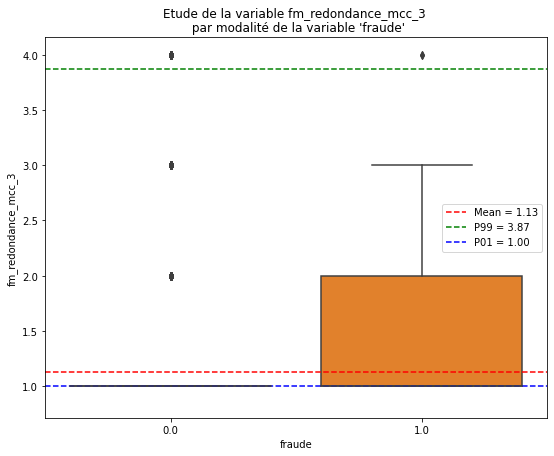

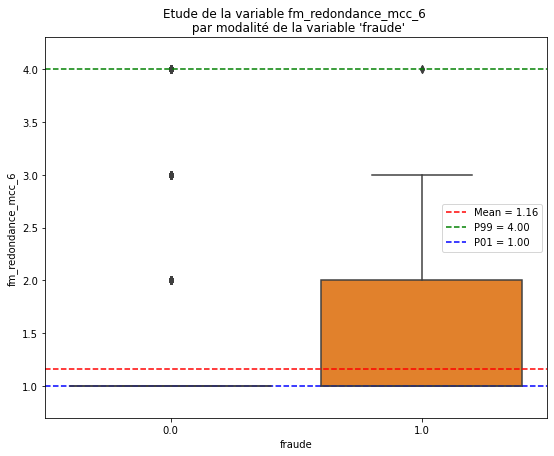

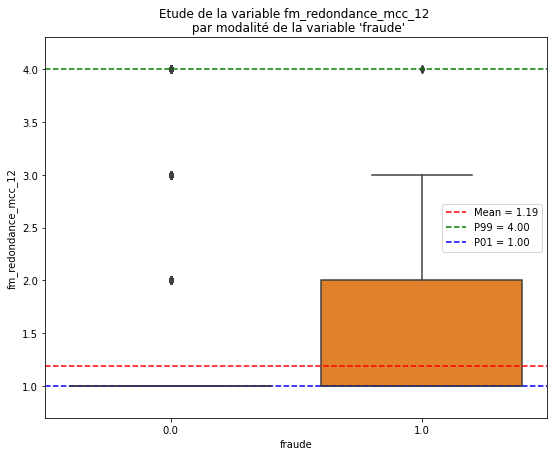

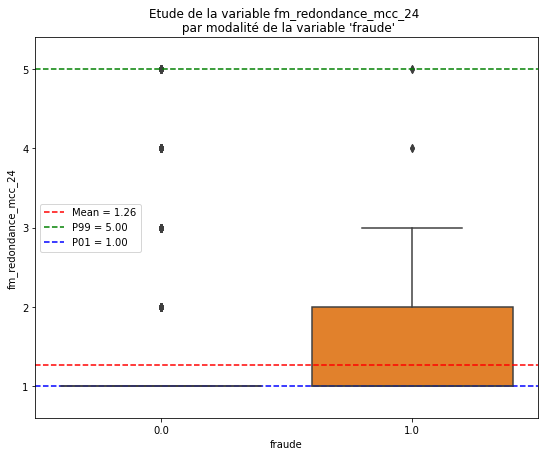

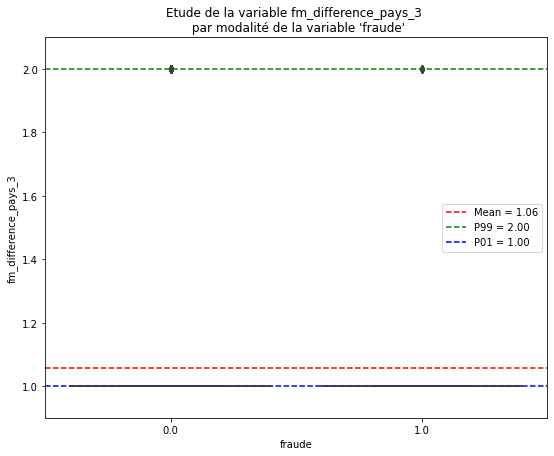

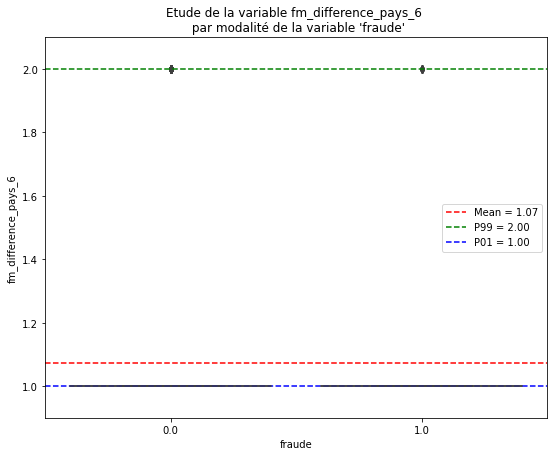

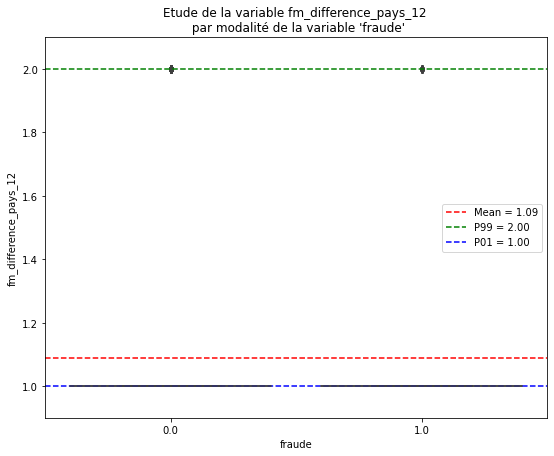

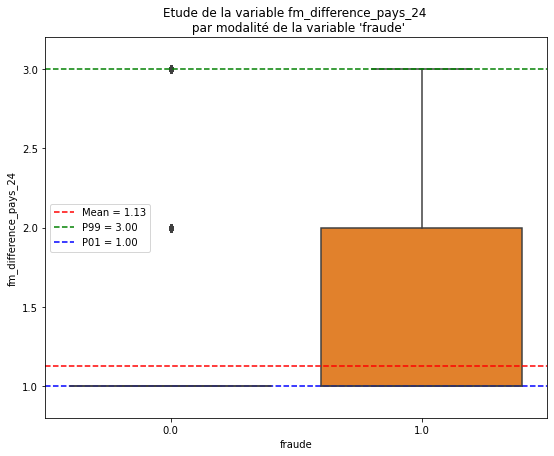

In [19]:
for var in var_num:
    boxplot_by_target(var, cleaned_df, 'fraude', sample_fraction=0.01)